In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

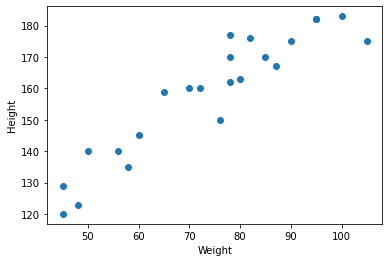

In [97]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [98]:
##divide the datasete into independent and dependent feature
X=df[['Weight']]
y=df[['Height']]

In [99]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_test.shape,X_test.shape,y_train.shape

((18, 1), (5, 1), (5, 1), (18, 1))

In [100]:
#standardised the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [101]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train,X_test,scaler.transform([[30]])
#here we are anly doing transform to the test data. This is because we want to use the mean and variance of the train data only
#this is because i want to remove the data leakage.Our model should not know anything about the test data 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]),
 array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]),
 array([[-2.50325873]]))

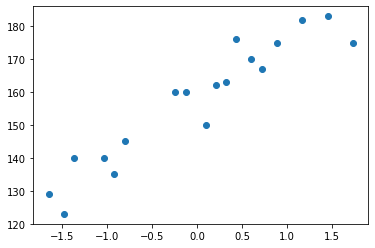

In [102]:
plt.scatter(X_train,y_train)#the x values got scaled between -1.5 to 1.5 

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [105]:
print('The slope of the weight feartue is' ,regressor.coef_)
print('The intercept of the weight feartue is' ,regressor.intercept_)

The slope of the weight feartue is [[17.03440872]]
The intercept of the weight feartue is [157.5]


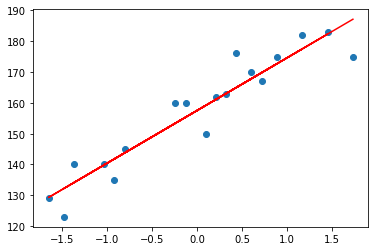

In [106]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),c='r')

In [107]:
y_test_pred=regressor.predict(X_test)
y_test_pred,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

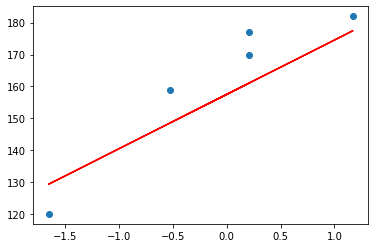

In [108]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,c='r')

In [109]:
#performance metrics MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
mse,mae,math.sqrt(mse)

(109.77592599051654, 9.822657814519227, 10.477400726827076)

## Model Score (R^2)

In [110]:
from sklearn.metrics import r2_score
model_score=r2_score(y_test,y_test_pred)
model_score

0.7769869860423441

## Predicting the new height when the weight is given

In [118]:
weight=int(input())
scaled_weight=scaler.transform([[weight]])
scaled_weight
pred_weight=regressor.predict(scaled_weight)
print('The height will be',pred_weight)

85
The height will be [[167.82599217]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
#residual
residual=y_test_pred-y_test
residual

,Height
15,-15.915329
9,-8.915329
0,9.304156
8,-4.543549
17,-10.434926


## we can see that the residual is normally distributed, hence it is good model

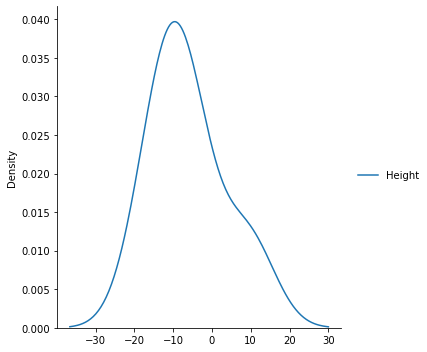

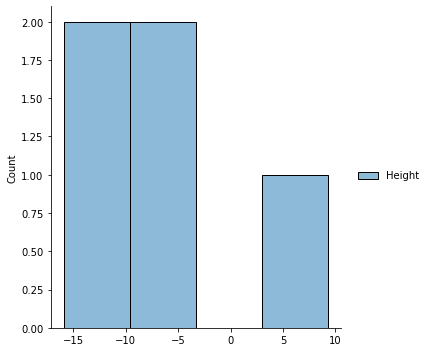

In [129]:
import seaborn as sns
sns.displot(residual,kind='kde')
sns.displot(residual,kind='hist')

## when the scatter plot of y_pred and y_test is linearly distributted, its is a good model

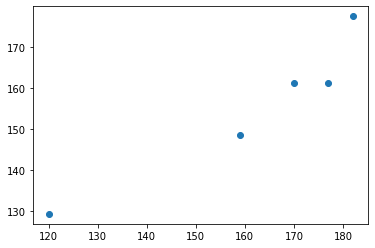

In [134]:
plt.scatter(y_test,y_test_pred)

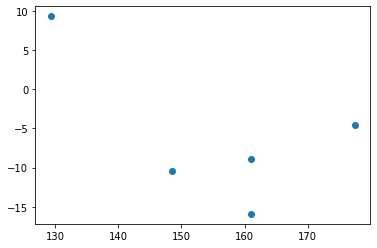

In [138]:
plt.scatter(y_test_pred,residual)
#This plot should be uniformly distributted in the space. Not concentrated 